# Fashion mnist using keras

In [6]:
# Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
# download fashion mnist dataset using keras.
from tensorflow.keras import datasets

In [25]:
#seeding the value so that value of random initialization will be same

In [2]:
from numpy.random import seed
seed(42)

In [26]:
# get fashion mnist data

In [3]:
fashion_mnist_dataset = datasets.fashion_mnist
(train_images_dataset, train_labels), (test_images_dataset, test_labels) = fashion_mnist_dataset.load_data()

In [4]:
# list of unique categories in fashion mnist
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# dimensions of training data
print("dimensions of training data: {shape}".format(shape=train_images_dataset.shape))
print("dimensions of training data: {shape}".format(shape=train_labels.shape))

# dimensions of test set
print("dimensions of test set: {shape}".format(shape=test_images_dataset.shape))
print("dimensions of test set: {shape}".format(shape=test_labels.shape))

dimensions of training data: (60000, 28, 28)
dimensions of training data: (60000,)
dimensions of test set: (10000, 28, 28)
dimensions of test set: (10000,)


In [7]:
# preprocessing (standardization) dataset
train_data_mean = np.mean(train_images_dataset[0])
train_data_stdev = np.std(train_images_dataset[0])
train_data = (train_images_dataset - train_data_mean)/train_data_stdev
test_data = (test_images_dataset - train_data_mean)/train_data_stdev

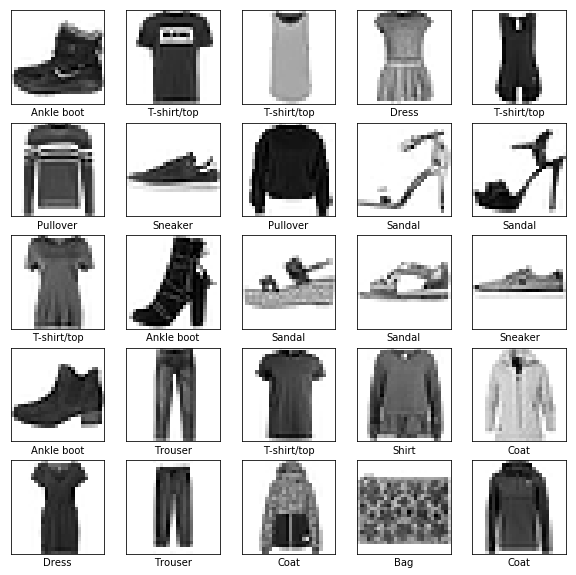

In [9]:
# diplay random images from training dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_dataset[i], cmap=plt.cm.binary)
    plt.xlabel(categories[train_labels[i]])
plt.show()

# build model

In [18]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer='RandomNormal', bias_initializer='RandomUniform'))
model.add(keras.layers.Dense(64, activation=tf.nn.relu, kernel_initializer='RandomNormal', bias_initializer='RandomUniform'))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

In [19]:
model.compile(optimizer=keras.optimizers.Adam(lr = 0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model_training = model.fit(train_data, train_labels, epochs=8, validation_split=0.05)

Train on 57000 samples, validate on 3000 samples
Epoch 1/8
57000/57000 [==============================] - 5s 83us/sample - loss: 0.2881 - acc: 0.8956 - val_loss: 0.3188 - val_acc: 0.8857
Epoch 2/8
57000/57000 [==============================] - 5s 85us/sample - loss: 0.2796 - acc: 0.8993 - val_loss: 0.3306 - val_acc: 0.8837
Epoch 3/8
57000/57000 [==============================] - 5s 84us/sample - loss: 0.2712 - acc: 0.9014 - val_loss: 0.3044 - val_acc: 0.8830
Epoch 4/8
57000/57000 [==============================] - 5s 85us/sample - loss: 0.2635 - acc: 0.9042 - val_loss: 0.3064 - val_acc: 0.8890
Epoch 5/8
57000/57000 [==============================] - 5s 84us/sample - loss: 0.2569 - acc: 0.9069 - val_loss: 0.3158 - val_acc: 0.8820
Epoch 6/8
57000/57000 [==============================] - 5s 85us/sample - loss: 0.2491 - acc: 0.9091 - val_loss: 0.3018 - val_acc: 0.8920
Epoch 7/8
57000/57000 [==============================] - 5s 84us/sample - loss: 0.2435 - acc: 0.9111 - val_loss: 0.3105 - v

In [28]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3334 - acc: 0.8819
Test accuracy: 0.8819


In [29]:
print(model_training.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


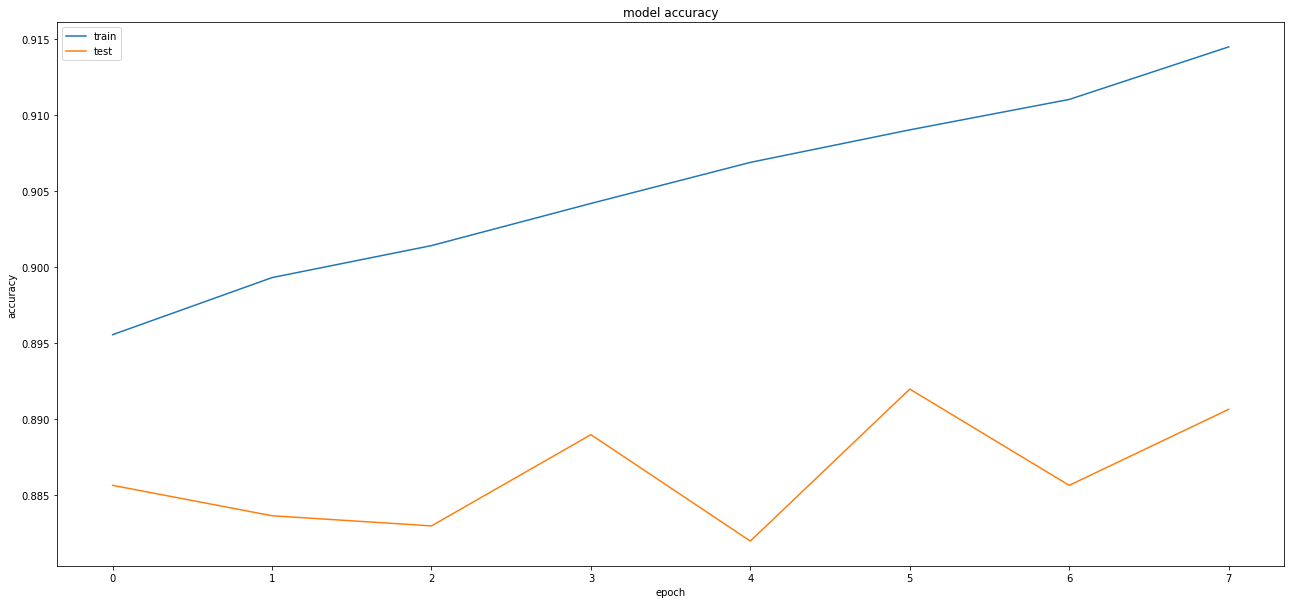

In [30]:
plt.figure(figsize=(22, 10))
plt.plot(model_training.history['acc'])
plt.plot(model_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

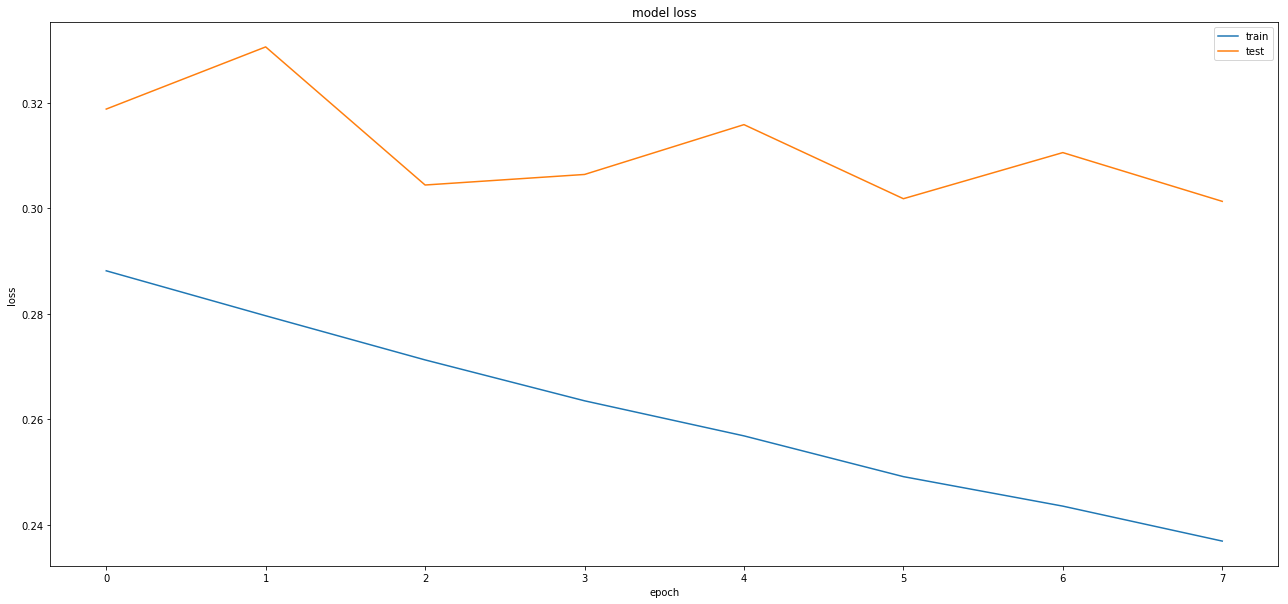

In [31]:
plt.figure(figsize=(22, 10))
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()